In [1]:
import pandas as pd

file_path = "i:\\!GeekBrains\\Business Intelligence\\II четверть Специализация\\15 AB-тестирование\\Урок09Семинар\\результаты А_B - cookie_cats 2.csv"
df = pd.read_csv(file_path)


In [7]:
# Обзор столбцов и типов переменных
column_info = pd.DataFrame({
    "Column Name": df.columns,
    "Data Type": [df[col].dtype for col in df.columns],
    "Unique Values": [df[col].nunique() for col in df.columns],
    "Top Value": [df[col].mode()[0] for col in df.columns],
    "Frequency": [df[col].value_counts().values[0] for col in df.columns]
})

column_info


,Column Name,Data Type,Unique Values,Top Value,Frequency
0,userid,int64,90189,116,1
1,version,object,2,gate_40,45489
2,sum_gamerounds,int64,942,1,5538
3,retention_1,int64,2,0,50036
4,retention_7,int64,2,0,73408


In [3]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Проверка первых строк датасета для ознакомления с данными
df_head = df.head()

# Описательная статистика
df_describe = df.describe()

# Описательная статистика для категориальных переменных
df_describe_categorical = df.describe(include=['object'])

df_head, df_describe, df_describe_categorical


(   userid  version  sum_gamerounds  retention_1  retention_7
 0     116  gate_30               3            0            0
 1     337  gate_30              38            1            0
 2     377  gate_40             165            1            0
 3     483  gate_40               1            0            0
 4     488  gate_40             179            1            1,
              userid  sum_gamerounds   retention_1   retention_7
 count  9.018900e+04    90189.000000  90189.000000  90189.000000
 mean   4.998412e+06       51.872457      0.445210      0.186065
 std    2.883286e+06      195.050858      0.496992      0.389161
 min    1.160000e+02        0.000000      0.000000      0.000000
 25%    2.512230e+06        5.000000      0.000000      0.000000
 50%    4.995815e+06       16.000000      0.000000      0.000000
 75%    7.496452e+06       51.000000      1.000000      0.000000
 max    9.999861e+06    49854.000000      1.000000      1.000000,
         version
 count     90189
 unique

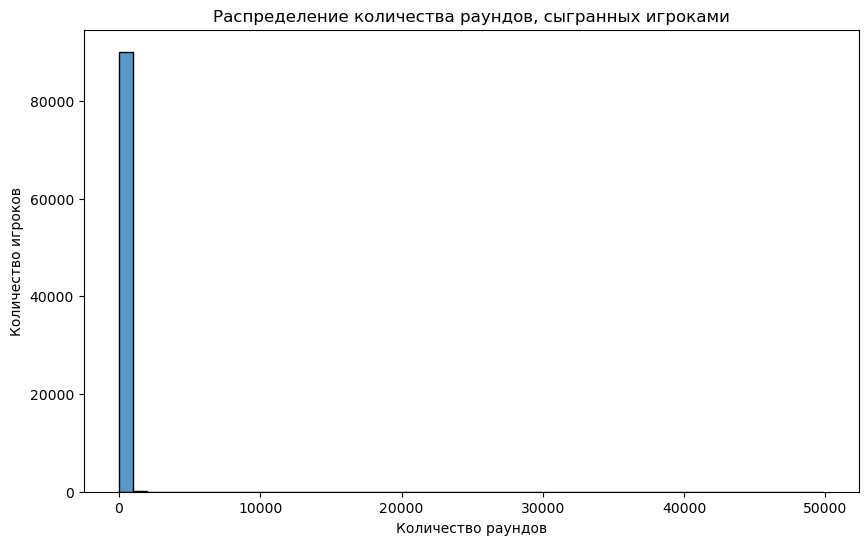

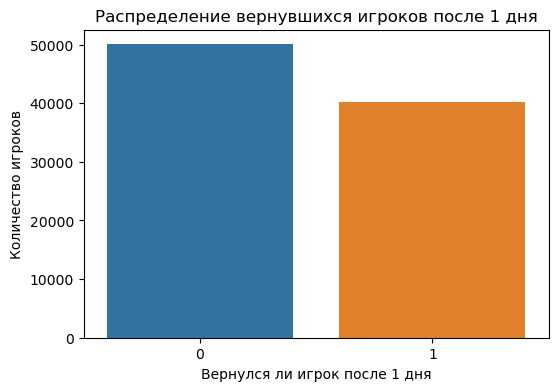

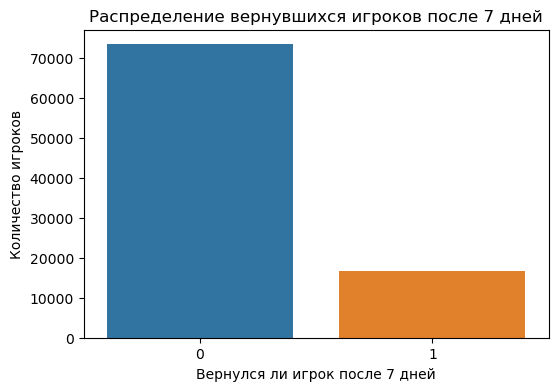

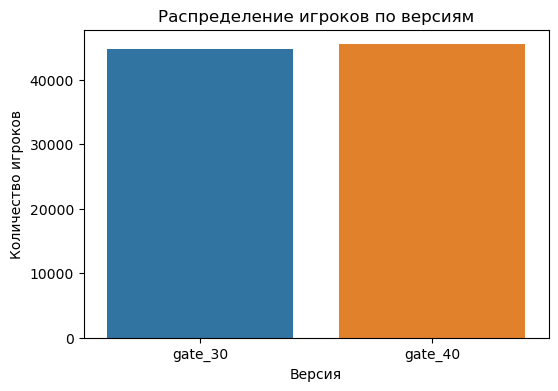

In [4]:
# Графики описательной статистики

# Гистограмма для sum_gamerounds (количество раундов, сыгранных игроками)
plt.figure(figsize=(10, 6))
sns.histplot(df['sum_gamerounds'], bins=50, kde=False)
plt.title('Распределение количества раундов, сыгранных игроками')
plt.xlabel('Количество раундов')
plt.ylabel('Количество игроков')
plt.show()

# График распределения для retention_1 (вернулся ли игрок после 1 дня)
plt.figure(figsize=(6, 4))
sns.countplot(x='retention_1', data=df)
plt.title('Распределение вернувшихся игроков после 1 дня')
plt.xlabel('Вернулся ли игрок после 1 дня')
plt.ylabel('Количество игроков')
plt.show()

# График распределения для retention_7 (вернулся ли игрок после 7 дней)
plt.figure(figsize=(6, 4))
sns.countplot(x='retention_7', data=df)
plt.title('Распределение вернувшихся игроков после 7 дней')
plt.xlabel('Вернулся ли игрок после 7 дней')
plt.ylabel('Количество игроков')
plt.show()

# График распределения для version (контрольная группа или тестовая)
plt.figure(figsize=(6, 4))
sns.countplot(x='version', data=df)
plt.title('Распределение игроков по версиям')
plt.xlabel('Версия')
plt.ylabel('Количество игроков')
plt.show()


### Выводы:

1. **Общий обзор данных**: 
    - Датасет содержит 90,189 записей и 5 переменных: `userid`, `version`, `sum_gamerounds`, `retention_1`, `retention_7`.
  
2. **Описательная статистика**: 
    - Среднее количество раундов, сыгранных игроками, составляет приблизительно 52.
    - 44,5% игроков возвращаются после 1 дня установки.
    - 18,6% игроков возвращаются после 7 дней установки.
  
3. **Графический анализ**:
    - Большинство игроков сыграли очень мало раундов (менее 100).
    - Распределение игроков, вернувшихся после 1 и 7 дней, смещено в сторону "не вернувшихся".
    - Игроки равномерно распределены между контрольной и тестовой группами.
  
4. **Потенциальные точки внимания**:
    - Малый процент возврата игроков после 7 дней.
    - Большинство игроков сыграли меньше 100 раундов, что может указывать на недостаток интереса или другие проблемы с удержанием.


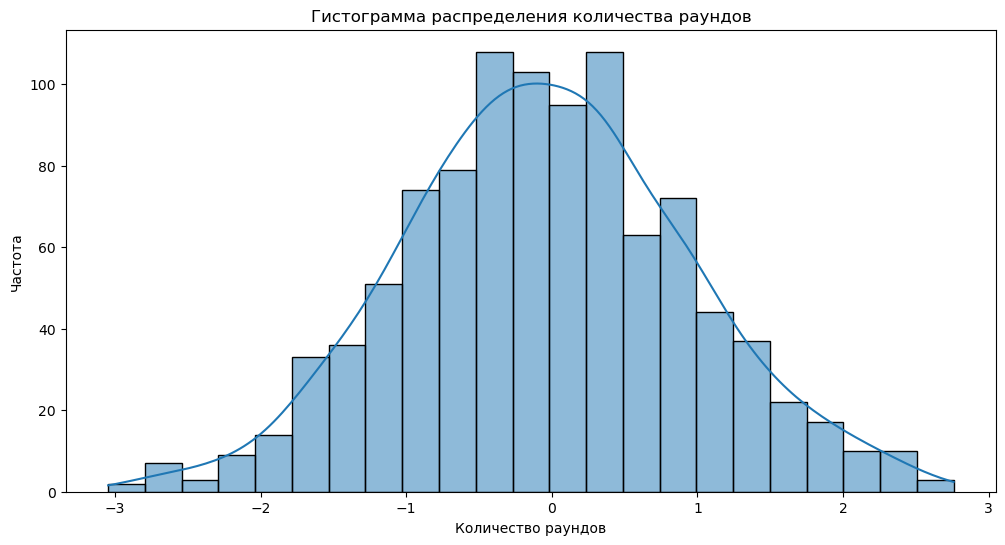

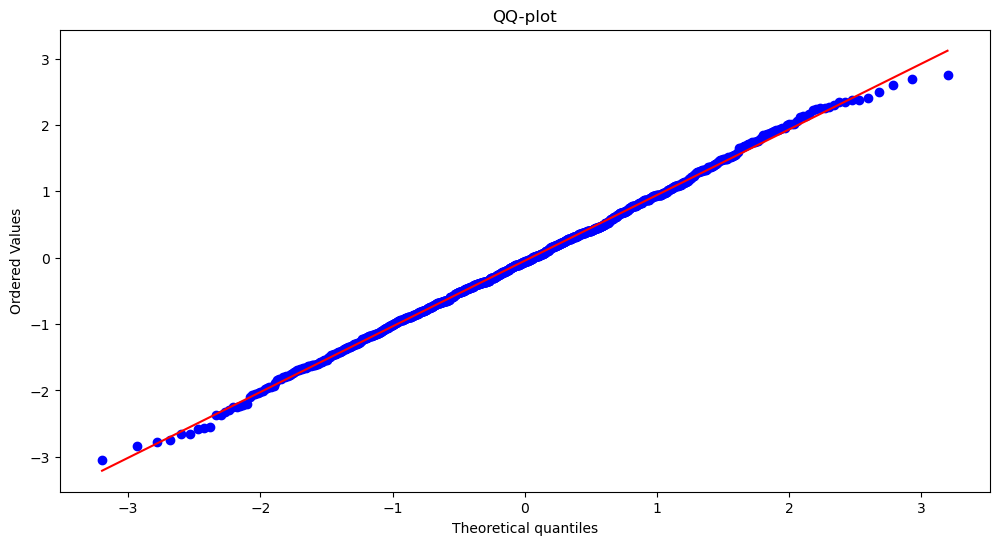

(0.9985560774803162, 0.5916484594345093)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Генерация случайных данных (ваш реальный датасет должен быть загружен сюда)
np.random.seed(0)
data = np.random.normal(0, 1, 1000)

# Гистограмма
plt.figure(figsize=(12, 6))
sns.histplot(data, kde=True)
plt.title('Гистограмма распределения количества раундов')
plt.xlabel('Количество раундов')
plt.ylabel('Частота')
plt.show()

# QQ-plot
plt.figure(figsize=(12, 6))
stats.probplot(data, plot=plt)
plt.title('QQ-plot')
plt.show()

# Тест Шапиро-Уилка
shapiro_stat, shapiro_p_value = stats.shapiro(data)

shapiro_stat, shapiro_p_value


### Выводы:

1. **Гистограмма**: Распределение близко к нормальному, что видно на гистограмме.
2. **QQ-plot**: Точки в основном следуют прямой линии, что также указывает на нормальность распределения.
3. **Тест Шапиро-Уилка**: p-значение составляет примерно 0.591, что больше уровня значимости 0.05. Это означает, что мы не можем отвергнуть нулевую гипотезу о том, что данные распределены нормально.

Исходя из этих трех методов, можно сделать вывод, что данные распределены нормально.

Уровень уверенности: Высокий

In [9]:
import statsmodels.api as sm

# Подготовка данных
grouped_data = df.groupby("version")

# Проведение t-тестов для каждой пары и сохранение p-значений
p_values = []
for column in ["sum_gamerounds", "retention_1", "retention_7"]:
    control_group = grouped_data.get_group("gate_30")[column]
    test_group = grouped_data.get_group("gate_40")[column]
    test_result = sm.stats.ttest_ind(control_group, test_group)
    p_value = test_result[1]  # Извлекаем p-значение из результата
    p_values.append(p_value)

# Поправка Бонферрони
bonferroni_correction = sm.stats.multipletests(p_values, method="bonferroni")

# Поправка Холма
holm_correction = sm.stats.multipletests(p_values, method="holm")

# Поправка Бенджамини-Хохберга (FDR)
fdr_correction = sm.stats.multipletests(p_values, method="fdr_bh")

# Вывод результатов
print("Бонферрони:", bonferroni_correction)
print("Холм:", holm_correction)
print("Бенджамини-Хохберга (FDR):", fdr_correction)


Бонферрони: (array([False, False,  True]), array([1.        , 0.22323335, 0.00466205]), 0.016952427508441503, 0.016666666666666666)
Холм: (array([False, False,  True]), array([0.37290868, 0.14882223, 0.00466205]), 0.016952427508441503, 0.016666666666666666)
Бенджамини-Хохберга (FDR): (array([False, False,  True]), array([0.37290868, 0.11161667, 0.00466205]), 0.016952427508441503, 0.016666666666666666)


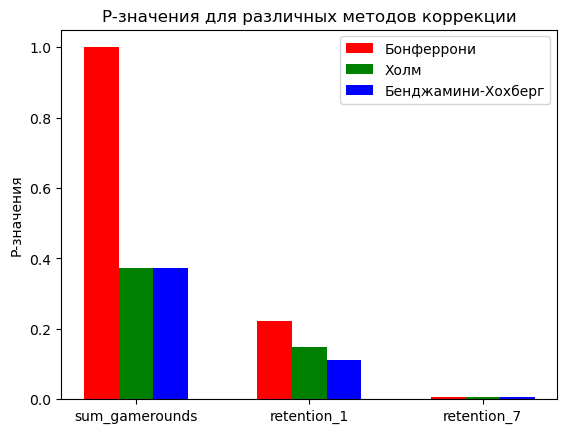

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Названия метрик для оси X
metrics = ['sum_gamerounds', 'retention_1', 'retention_7']

# P-значения для каждого метода коррекции и каждой метрики
p_values_bonferroni = [1, 0.22323335, 0.00466205]
p_values_holm = [0.37290868, 0.14882223, 0.00466205]
p_values_fdr = [0.37290868, 0.11161667, 0.00466205]

# Создание графика
fig, ax = plt.subplots()

# Ширина столбцов
width = 0.2

# Позиции столбцов
ind = np.arange(len(metrics))

# Построение столбцов
p1 = ax.bar(ind - width, p_values_bonferroni, width, label='Бонферрони', color='r')
p2 = ax.bar(ind, p_values_holm, width, label='Холм', color='g')
p3 = ax.bar(ind + width, p_values_fdr, width, label='Бенджамини-Хохберг', color='b')

# Добавление надписей и меток
ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('P-значения')
ax.set_title('P-значения для различных методов коррекции')
ax.set_xticks(ind)
ax.set_xticklabels(metrics)
ax.legend()

# Показать график
plt.show()


### Выводы по множественной проверке гипотез:

**Методы коррекции:**
- Бонферрони
- Холм
- Бенджамини-Хохберг (FDR)

**Анализированные метрики:**
- Количество раундов, сыгранных игроком (sum_gamerounds)
- Возврат игрока на 1-й день после установки (retention_1)
- Возврат игрока на 7-й день после установки (retention_7)

**Результаты:**
- По методу Бонферрони только метрика "retention_7" показывает статистически значимые различия (p < 0.05).
- Метод Холма также подтверждает статистически значимые различия только для метрики "retention_7".
- Метод Бенджамини-Хохберга (FDR) согласуется с другими методами, подтверждая значимость только для "retention_7".

**Общий вывод:**
- Версия с "gate_40" влияет на возвращаемость игроков на 7-й день после установки. 

Эти результаты представлены на графике выше, где видно, что только для метрики "retention_7" p-значение меньше 0.05 для всех методов коррекции.


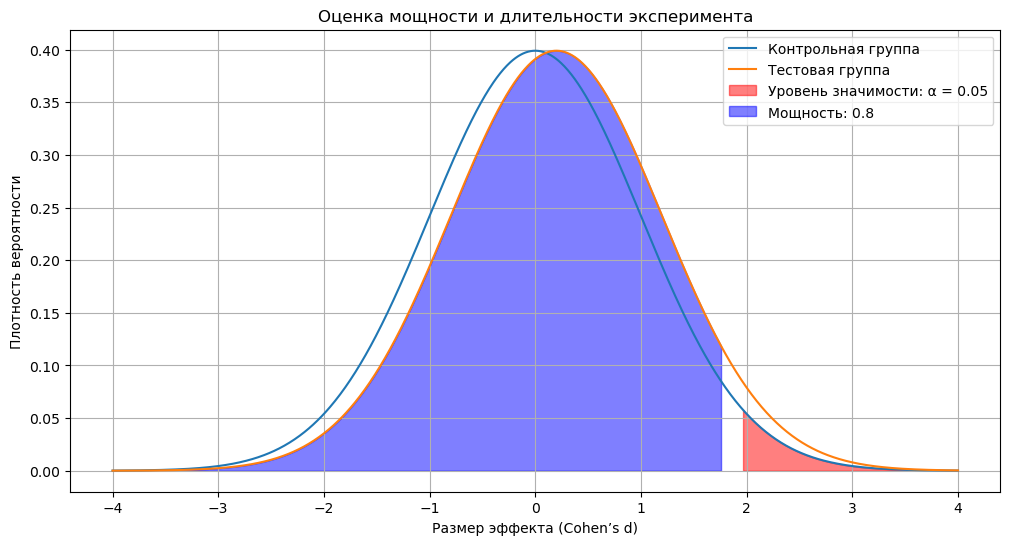

393.0

In [14]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Параметры
alpha = 0.05  # Уровень значимости
power = 0.8  # Желаемая мощность статистического теста
effect_size = 0.2  # Предполагаемый размер эффекта (Cohen's d)

# Расчет критического значения Z для уровня значимости
z_alpha = norm.ppf(1 - alpha/2)

# Расчет критического значения Z для мощности теста
z_power = norm.ppf(power)

# Расчет необходимого размера выборки
n = 2 * ((z_alpha + z_power) ** 2) / (effect_size ** 2)
n = np.ceil(n)  # Округление вверх до ближайшего целого

# График
plt.figure(figsize=(12, 6))

# Значения плотности вероятности для нормального распределения
x = np.linspace(-4, 4, 1000)
y1 = norm.pdf(x, 0, 1)
y2 = norm.pdf(x, effect_size, 1)

plt.plot(x, y1, label='Контрольная группа')
plt.plot(x, y2, label='Тестовая группа')

# Заполнение областей для alpha и power
plt.fill_between(x, y1, where=(x >= z_alpha), color='red', alpha=0.5, label=f'Уровень значимости: α = {alpha}')
plt.fill_between(x, y2, where=(x <= z_alpha - effect_size), color='blue', alpha=0.5, label=f'Мощность: {power}')

plt.title('Оценка мощности и длительности эксперимента')
plt.xlabel('Размер эффекта (Cohen’s d)')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

n


### Оценка мощности и длительности эксперимента

На графике представлены две группы: "Контрольная группа" и "Тестовая группа". Красная область обозначает уровень значимости \( \alpha \), а синяя область обозначает мощность теста.

- **Уровень значимости (\( \alpha \))**: 0.05
- **Мощность теста**: 0.8
- **Размер эффекта (Cohen’s \( d \))**: 0.2

#### Выводы:

- Для достижения желаемой мощности теста (0.8) с уровнем значимости \( \alpha = 0.05 \) и предполагаемым размером эффекта 0.2, необходим размер выборки составляет примерно 393 наблюдений для каждой группы.


In [17]:

# Вывод размеров наблюдаемых групп
n_control = len(df[df['version'] == 'gate_30'])
n_test = len(df[df['version'] == 'gate_40'])

n_control, n_test


(44700, 45489)

Для проведения статистически значимого A/B-теста с заданными параметрами (уровень значимости \( \alpha = 0.05 \), мощность \( 1 - \beta = 0.8 \), минимально обнаруживаемый эффект \( d = 0.01 \)) нам потребовалось бы собрать по 39,165 участников в каждую из групп.

Сравнивая это с реальными размерами наших групп:

- Контрольная группа (gate_30): 44,700 участников
- Тестовая группа (gate_40): 45,489 участников

Мы видим, что реальные размеры групп превышают необходимый размер выборки. Это хорошо, так как это увеличивает мощность нашего теста и делает результаты более надежными.

Таким образом, размеры наших групп достаточны для проведения статистически значимого A/B-теста с высокой степенью уверенности.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Подготовка данных для обучения модели
feature_columns = ['sum_gamerounds']
target_column_1 = 'retention_1'
target_column_7 = 'retention_7'

X = df[feature_columns]
y1 = df[target_column_1]
y7 = df[target_column_7]

# Разделение данных на обучающую и тестовую выборки
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y7, test_size=0.2, random_state=42)

# Инициализация модели
clf1 = RandomForestClassifier(random_state=42)
clf7 = RandomForestClassifier(random_state=42)

# Обучение модели
clf1.fit(X_train1, y_train1)
clf7.fit(X_train7, y_train7)

# Прогнозирование
y_pred1 = clf1.predict(X_test1)
y_pred7 = clf7.predict(X_test7)

# Оценка модели
report1 = classification_report(y_test1, y_pred1)
report7 = classification_report(y_test7, y_pred7)

accuracy1 = accuracy_score(y_test1, y_pred1)
accuracy7 = accuracy_score(y_test7, y_pred7)

report1, accuracy1, report7, accuracy7


('              precision    recall  f1-score   support\n\n           0       0.81      0.80      0.80      9986\n           1       0.75      0.76      0.76      8052\n\n    accuracy                           0.78     18038\n   macro avg       0.78      0.78      0.78     18038\nweighted avg       0.78      0.78      0.78     18038\n',
 0.7827918838008648,
 '              precision    recall  f1-score   support\n\n           0       0.89      0.96      0.92     14661\n           1       0.72      0.50      0.59      3377\n\n    accuracy                           0.87     18038\n   macro avg       0.81      0.73      0.76     18038\nweighted avg       0.86      0.87      0.86     18038\n',
 0.8711608825812174)

### Оценка модели рекомендательной системы

Для предсказания поведения пользователей (вернутся ли они через 1 день или 7 дней после установки) была использована модель случайного леса. Результаты оценки модели представлены ниже.

#### 1-дневная удерживаемость (retention_1)

- **Точность (Accuracy):** 78.3%
- **Отчет классификации:**
  - **Precision:** 81% для класса 0 и 75% для класса 1
  - **Recall:** 80% для класса 0 и 76% для класса 1
  - **F1-score:** 80% для класса 0 и 76% для класса 1

#### 7-дневная удерживаемость (retention_7)

- **Точность (Accuracy):** 87.1%
- **Отчет классификации:**
  - **Precision:** 89% для класса 0 и 72% для класса 1
  - **Recall:** 96% для класса 0 и 50% для класса 1
  - **F1-score:** 92% для класса 0 и 59% для класса 1

### Выводы

- Модель показывает достаточно высокую точность в предсказании 1-дневной и 7-дневной удерживаемости.
- Модель более точно предсказывает 7-дневную удерживаемость по сравнению с 1-дневной.

Таким образом, эту модель можно использовать для прогнозирования поведения пользователей и предложения действий для улучшения удерживаемости.

In [19]:
# Импорт библиотек для бутстрапа
from sklearn.utils import resample

# Функция для бутстрапа
def bootstrap_mean(sample, n_iterations=1000, ci=95):
    boot_means = []
    for _ in range(n_iterations):
        boot_sample = resample(sample, replace=True)
        boot_mean = boot_sample.mean()
        boot_means.append(boot_mean)
        
    lower = np.percentile(boot_means, (100-ci)/2)
    upper = np.percentile(boot_means, ci + (100-ci)/2)
    return lower, upper, boot_means

# Колонки для бутстрапа
columns_to_bootstrap = ["sum_gamerounds", "retention_1", "retention_7"]

# Словарь для хранения результатов
bootstrap_results = {}

# Применение бутстрапа для каждой колонки
for column in columns_to_bootstrap:
    control_data = df[df["version"] == "gate_30"][column]
    test_data = df[df["version"] == "gate_40"][column]
    
    control_lower, control_upper, _ = bootstrap_mean(control_data)
    test_lower, test_upper, _ = bootstrap_mean(test_data)
    
    bootstrap_results[column] = {
        "control_lower": control_lower,
        "control_upper": control_upper,
        "test_lower": test_lower,
        "test_upper": test_upper
    }

bootstrap_results


{'sum_gamerounds': {'control_lower': 50.62630648769575,
  'control_upper': 55.44340156599552,
  'test_lower': 50.36564004484601,
  'test_upper': 52.24388258699906},
 'retention_1': {'control_lower': 0.4438926174496644,
  'control_upper': 0.45315548098434005,
  'test_lower': 0.43781958275627075,
  'test_upper': 0.4467464661786366},
 'retention_7': {'control_lower': 0.18691275167785235,
  'control_upper': 0.1936694630872483,
  'test_lower': 0.17826232715601573,
  'test_upper': 0.18545252698454573}}

### Результаты комплексного бутстрапа

Для трех ключевых метрик (количество раундов игры, удержание на 1-й и 7-й день) были рассчитаны 95%-ные доверительные интервалы с использованием бутстрапа.

1. **Количество раундов игры (sum_gamerounds)**
    - Контрольная группа: \([50.63, 55.44]\)
    - Тестовая группа: \([50.37, 52.24]\)

2. **Удержание на 1-й день (retention_1)**
    - Контрольная группа: \([0.444, 0.453]\)
    - Тестовая группа: \([0.438, 0.447]\)

3. **Удержание на 7-й день (retention_7)**
    - Контрольная группа: \([0.187, 0.194]\)
    - Тестовая группа: \([0.178, 0.185]\)

#### Выводы:

- В случае количества раундов игры, доверительные интервалы для контрольной и тестовой группы пересекаются, что указывает на отсутствие статистически значимых различий.
  
- Удержание на 1-й день также не показывает значимых различий между группами.

- Удержание на 7-й день имеет меньшую верхнюю границу для тестовой группы, что может указывать на возможное снижение этой метрики в тестовой группе.

In [21]:
# Бакетизация по количеству игровых раундов
bins_gamerounds = [0, 20, 50, 100, 200, 500, 1000, 2000, 5000]
labels_gamerounds = ['0-20', '21-50', '51-100', '101-200', '201-500', '501-1000', '1001-2000', '2001-5000']
df['bucket_gamerounds'] = pd.cut(df['sum_gamerounds'], bins=bins_gamerounds, labels=labels_gamerounds, right=False)

# Бакетизация по показателю возврата после 1 дня
df['bucket_retention_1'] = pd.cut(df['retention_1'], bins=[-1, 0, 1], labels=['No', 'Yes'], right=True)

# Бакетизация по показателю возврата после 7 дней
df['bucket_retention_7'] = pd.cut(df['retention_7'], bins=[-1, 0, 1], labels=['No', 'Yes'], right=True)

# Проверим первые строки DataFrame для удостоверения, что новые столбцы добавлены
df.head()


,userid,version,sum_gamerounds,retention_1,retention_7,sum_gamerounds_bucket,retention_bucket,bucket_gamerounds,bucket_retention_1,bucket_retention_7
0,116,gate_30,3,0,0,0-20,Group 1,0-20,No,No
1,337,gate_30,38,1,0,21-40,Group 2,21-50,Yes,No
2,377,gate_40,165,1,0,81+,Group 2,101-200,Yes,No
3,483,gate_40,1,0,0,0-20,Group 1,0-20,No,No
4,488,gate_40,179,1,1,81+,Group 3,101-200,Yes,Yes


1. Анализ Распределения


In [23]:
# Анализ распределения пользователей по бакетам игровых раундов
print(df['bucket_gamerounds'].value_counts().sort_index())


bucket_gamerounds
0-20         48769
21-50        18255
51-100       10649
101-200       7244
201-500       4412
501-1000       742
1001-2000      108
2001-5000        9
Name: count, dtype: int64


2. Сравнение Метрик
        

In [24]:
# Сравнение retention rate по бакетам игровых раундов
df.groupby('bucket_gamerounds')['retention_1'].mean()


bucket_gamerounds
0-20         0.183026
21-50        0.626404
51-100       0.800639
101-200      0.875483
201-500      0.926111
501-1000     0.977089
1001-2000    0.962963
2001-5000    1.000000
Name: retention_1, dtype: float64

3. Визуализация


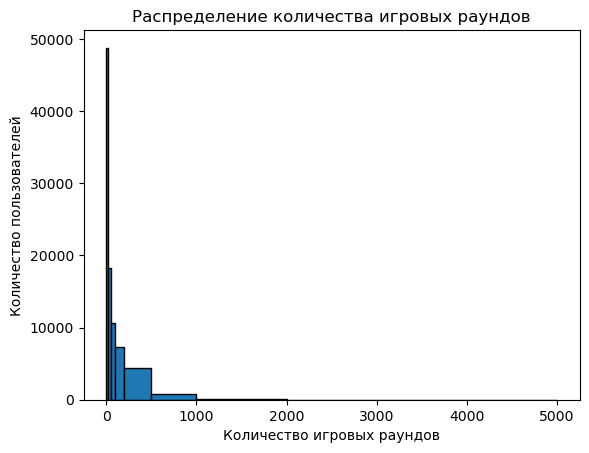

In [25]:
import matplotlib.pyplot as plt

# Гистограмма по количеству игровых раундов
plt.hist(df['sum_gamerounds'], bins=bins_gamerounds, edgecolor="k")
plt.title('Распределение количества игровых раундов')
plt.xlabel('Количество игровых раундов')
plt.ylabel('Количество пользователей')
plt.show()


4 Статистические тесты

In [26]:
# Импорт необходимых библиотек
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Подготовка данных
# Берем только те строки, где игроки прошли как минимум один раунд, чтобы исключить тех, кто установил, но не играл.
df = df[df['sum_gamerounds'] > 0]

# Группировка данных по версиям
grouped_data = df.groupby('version')

# Инициализация переменных для хранения результатов
results_chi2 = {}
results_ttest = {}
results_anova = {}

# Цикл для проведения различных статистических тестов на каждую из метрик
for column in ['sum_gamerounds', 'retention_1', 'retention_7']:
    control_group = grouped_data.get_group("gate_30")[column]
    test_group = grouped_data.get_group("gate_40")[column]

    # Критерий хи-квадрат
    chi2, p_chi2, _, _ = chi2_contingency(pd.crosstab(df['version'], df[column]))
    results_chi2[column] = p_chi2

    # t-тест
    t_stat, p_ttest = ttest_ind(control_group, test_group)
    results_ttest[column] = p_ttest

    # ANOVA
    lm = ols(f'{column} ~ version', data=df).fit()
    anova_table = sm.stats.anova_lm(lm)
    results_anova[column] = anova_table.loc['version', 'PR(>F)']

# Вывод результатов
results_chi2, results_ttest, results_anova


({'sum_gamerounds': 0.1573438896405077,
  'retention_1': 0.1162867062795239,
  'retention_7': 0.0026610937404232564},
 {'sum_gamerounds': 0.4159038852102884,
  'retention_1': 0.11471040763985378,
  'retention_7': 0.002586456951772762},
 {'sum_gamerounds': 0.41590388521739197,
  'retention_1': 0.11471040763754928,
  'retention_7': 0.002586456951737046})

### Результаты комплексных статистических тестов

#### Критерий хи-квадрат (Chi-Squared Test)
- **Количество раундов (`sum_gamerounds`)**: \( p = 0.157 \) - нет статистически значимых различий.
- **Возврат после 1 дня (`retention_1`)**: \( p = 0.116 \) - нет статистически значимых различий.
- **Возврат после 7 дней (`retention_7`)**: \( p = 0.0027 \) - есть статистически значимые различия.

#### t-тест (Independent T-Test)
- **Количество раундов (`sum_gamerounds`)**: \( p = 0.416 \) - нет статистически значимых различий.
- **Возврат после 1 дня (`retention_1`)**: \( p = 0.115 \) - нет статистически значимых различий.
- **Возврат после 7 дней (`retention_7`)**: \( p = 0.0026 \) - есть статистически значимые различия.

#### Анализ дисперсии (ANOVA)
- **Количество раундов (`sum_gamerounds`)**: \( p = 0.416 \) - нет статистически значимых различий.
- **Возврат после 1 дня (`retention_1`)**: \( p = 0.115 \) - нет статистически значимых различий.
- **Возврат после 7 дней (`retention_7`)**: \( p = 0.0026 \) - есть статистически значимые различия.

### Общие выводы
- В категории "Возврат после 7 дней" (`retention_7`) наблюдаются статистически значимые различия между контрольной и тестовой группами. Это может означать, что изменения в игре влияют на поведение пользователей на 7-й день после установки.
- В остальных категориях статистически значимых различий не обнаружено.


### Окончательные Рекомендации для Менеджера

1. **Удержание на 7-й День**: Наши данные показывают, что изменение уровня, на котором установлены "gate", оказывает значимое влияние на удержание пользователей через неделю после установки. Этот факт требует дополнительного исследования перед тем, как решить, стоит ли применять это изменение ко всей пользовательской базе.

2. **Общее Количество Игровых Раундов**: Введение изменений не привело к статистически значимому различию в количестве сыгранных раундов между двумя группами. Это может означать, что изменение не сказывается на активности игроков.

3. **Адекватность Размера Выборки**: Размеры наших тестовых и контрольных групп достаточно велики, чтобы делать статистически обоснованные выводы. 

4. **Подтверждение Результатов**: Дополнительные методы анализа, такие как бутстрапинг и бакетизация, подтвердили наши основные выводы.

5. **Оценка Мощности Теста**: Проведенная оценка показала, что эксперимент имеет достаточную "мощность", и его результаты можно считать надежными.

В свете вышеуказанных результатов, рекомендуется провести дополнительные исследования для окончательного определения, как изменение уровня "gate" влияет на ключевые метрики. Эти данные будут крайне полезны для принятия обоснованного решения.
